# Comparison CUTonalá and PVlib forecast using GFS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [3]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [4]:
cec_module

Technology           Multi-c-Si
Bifacial                      0
STC                     319.792
PTC                       292.8
A_c                       1.901
Length                    1.948
Width                     0.976
N_s                          72
I_sc_ref                   9.26
V_oc_ref                   45.3
I_mp_ref                   8.69
V_mp_ref                   36.8
alpha_sc               0.004389
beta_oc               -0.139116
T_NOCT                     45.8
a_ref                   1.78528
I_L_ref                  9.2705
I_o_ref             8.72084e-11
R_s                    0.362235
R_sh_ref                319.379
Adjust                  5.85738
gamma_r                 -0.4002
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Canadian_Solar_Inc__CS6X_320P, dtype: object

In [5]:
cec_inverter

Vac                          480
Pso                       75.262
Paco                       39950
Pdco                     41044.5
Vdco                         700
C0                  -4.21213e-07
C1                      -3.3e-05
C2                      0.000303
C3                     -0.001313
Pnt                       11.985
Vdcmax                       820
Idcmax                   58.6349
Mppt_low                     520
Mppt_high                    820
CEC_Date               5/15/2018
CEC_Type     Utility Interactive
Name: INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_, dtype: object

In [6]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [7]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [8]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [9]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=None, 
                 name='Name of PV system: Huerto de Cutonalá')

In [10]:
#system

In [11]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [12]:
#mc

In [13]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#9 de diciebre a partir del 24 de diciembre
start9_dec = start - pd.Timedelta(days=15)
end9_dec = start9_dec + pd.Timedelta(days=1)

In [14]:
start9_dec

Timestamp('2020-12-09 00:00:00-0600', tz='America/Mexico_City')

In [15]:
end9_dec

Timestamp('2020-12-10 00:00:00-0600', tz='America/Mexico_City')

In [16]:
from pvlib import solarposition, irradiance, atmosphere, pvsystem, inverter, temperature, iam
from pvlib.forecast import GFS, NAM, NDFD, RAP, HRRR

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [17]:
# Se define el modelo de pronostico
fm = GFS()
#fm = NAM()
#fm = NDFD()
#fm = RAP()
#fm = HRRR()

In [18]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start9_dec, end9_dec)

In [19]:
#pd.set_option('display.max_columns', None)
forecast_data.head()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-12-09 06:00:00-06:00,14.222504,0.530006,0.000000,0.000000,0.000000,96.0,0.0,38.0,94.0
2020-12-09 09:00:00-06:00,13.035370,0.824129,178.799104,107.607499,142.093117,60.0,0.0,1.0,60.0
2020-12-09 12:00:00-06:00,11.983917,1.518421,526.032816,260.404947,341.456002,43.0,0.0,1.0,43.0
2020-12-09 15:00:00-06:00,18.998260,1.151956,577.015548,813.945280,103.736876,0.0,0.0,0.0,0.0
2020-12-09 18:00:00-06:00,32.964172,0.950516,4.974719,0.000000,4.974719,1.0,0.0,1.0,0.0


In [20]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [21]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [22]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [23]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2020-12-09 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2020-12-09 09:00:00-06:00,1.493657e+01,844.110553,1.408174e+01,725.886156,10221.740241,1.482703e+01,1.124183e+01
2020-12-09 12:00:00-06:00,4.423736e+01,848.585170,4.151528e+01,705.699374,29297.304984,4.391226e+01,3.104365e+01
2020-12-09 15:00:00-06:00,5.800239e+01,819.575619,5.414254e+01,665.011384,36005.404384,5.759063e+01,3.920319e+01
2020-12-09 18:00:00-06:00,3.564014e-01,669.101984,3.320514e-01,567.723030,188.513243,3.543130e-01,2.666639e-01
2020-12-09 21:00:00-06:00,-4.135903e-25,0.000000,-4.135903e-25,0.000000,-0.000000,-4.135903e-25,-4.135903e-25
2020-12-10 00:00:00-06:00,5.169879e-26,0.000000,5.169879e-26,0.000000,0.000000,5.169879e-26,5.169879e-26


In [24]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2020-12-09 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,2020-12-09 09:00:00-06:00,1.493657e+01,844.110553,1.408174e+01,725.886156,10221.740241,1.482703e+01,1.124183e+01
2,2020-12-09 12:00:00-06:00,4.423736e+01,848.585170,4.151528e+01,705.699374,29297.304984,4.391226e+01,3.104365e+01
3,2020-12-09 15:00:00-06:00,5.800239e+01,819.575619,5.414254e+01,665.011384,36005.404384,5.759063e+01,3.920319e+01
4,2020-12-09 18:00:00-06:00,3.564014e-01,669.101984,3.320514e-01,567.723030,188.513243,3.543130e-01,2.666639e-01
5,2020-12-09 21:00:00-06:00,-4.135903e-25,0.000000,-4.135903e-25,0.000000,-0.000000,-4.135903e-25,-4.135903e-25
6,2020-12-10 00:00:00-06:00,5.169879e-26,0.000000,5.169879e-26,0.000000,0.000000,5.169879e-26,5.169879e-26


In [25]:
droped_forecas_data = forecast_dc.drop([0,5,6])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0   2020-12-09 09:00:00-06:00
1   2020-12-09 12:00:00-06:00
2   2020-12-09 15:00:00-06:00
3   2020-12-09 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [26]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0    10221.740241
1    29297.304984
2    36005.404384
3      188.513243
Name: p_mp, dtype: float64

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dec9_cut = pd.read_csv('./dec9.csv')

In [28]:
droped_data_cut = dec9_cut.drop([0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,45,46])
droped_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
8,360019291468,03M172129A80,2020-12-09 09:00:00,group1/device6,276.08,280.37,282.88,19.35,19.33,19.19,60.00,16076.00,-0.12,0.11,737.36,695.05,12.10,10.83,8924.33,7530.33,0,12.59
20,360019291468,03M172129A80,2020-12-09 12:00:00,group1/device6,271.69,276.16,278.95,42.46,42.62,42.32,60.00,35039.23,-8.56,-0.16,654.58,600.95,28.92,28.41,18945.67,17083.89,0,97.44
32,360019291468,03M172129A80,2020-12-09 15:00:00,group1/device6,275.24,279.59,283.05,34.31,34.48,34.23,59.99,28693.23,4.89,0.36,662.23,620.28,23.09,22.85,15296.23,14186.77,0,198.39
44,360019291468,03M172129A80,2020-12-09 18:00:00,group1/device6,272.81,278.40,282.52,2.25,2.16,2.18,60.00,279.89,0.00,-0.27,618.19,588.09,0.23,0.24,141.11,138.22,0,235.63


In [29]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0    16076.00
1    35039.23
2    28693.23
3      279.89
Name: Pac(W), dtype: float64

In [30]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2020-12-09 09:00:00-06:00,16076.00,10221.740241
1,2020-12-09 12:00:00-06:00,35039.23,29297.304984
2,2020-12-09 15:00:00-06:00,28693.23,36005.404384
3,2020-12-09 18:00:00-06:00,279.89,188.513243


In [31]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2020-12-09 09:00:00-06:00,16076.00,10221.740241
2020-12-09 12:00:00-06:00,35039.23,29297.304984
2020-12-09 15:00:00-06:00,28693.23,36005.404384
2020-12-09 18:00:00-06:00,279.89,188.513243


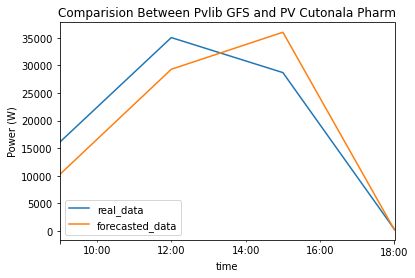

In [32]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib GFS and PV Cutonala Pharm');

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [33]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [34]:
real = comparision['real_data']
real

time
2020-12-09 09:00:00-06:00    16076.00
2020-12-09 12:00:00-06:00    35039.23
2020-12-09 15:00:00-06:00    28693.23
2020-12-09 18:00:00-06:00      279.89
Name: real_data, dtype: float64

In [35]:
forecasted = comparision['forecasted_data']
forecasted

time
2020-12-09 09:00:00-06:00    10221.740241
2020-12-09 12:00:00-06:00    29297.304984
2020-12-09 15:00:00-06:00    36005.404384
2020-12-09 18:00:00-06:00      188.513243
Name: forecasted_data, dtype: float64

In [36]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:30179576.039093204
RMSE:5493.594091220538
MSLE:0.11085234417004527
RMSLE:0.33294495666708224
MAE:4749.933979198888


In [37]:
mc.ac

2020-12-09 06:00:00-06:00      -11.985000
2020-12-09 09:00:00-06:00    10029.205032
2020-12-09 12:00:00-06:00    28643.829378
2020-12-09 15:00:00-06:00    35076.433846
2020-12-09 18:00:00-06:00      115.232045
2020-12-09 21:00:00-06:00      -11.985000
2020-12-10 00:00:00-06:00      -11.985000
dtype: float64

In [38]:
mc.airmass

,airmass_relative,airmass_absolute
2020-12-09 06:00:00-06:00,NaN,NaN
2020-12-09 09:00:00-06:00,2.905578,2.411658
2020-12-09 12:00:00-06:00,1.408879,1.169383
2020-12-09 15:00:00-06:00,1.715667,1.424020
2020-12-09 18:00:00-06:00,18.657825,15.486173
2020-12-09 21:00:00-06:00,NaN,NaN
2020-12-10 00:00:00-06:00,NaN,NaN


In [39]:
mc.cec

<bound method ModelChain.cec of ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses>

In [40]:
mc.cell_temperature

2020-12-09 06:00:00-06:00    14.222504
2020-12-09 09:00:00-06:00    19.624404
2020-12-09 12:00:00-06:00    30.698384
2020-12-09 15:00:00-06:00    43.883689
2020-12-09 18:00:00-06:00    33.119355
2020-12-09 21:00:00-06:00    32.349854
2020-12-10 00:00:00-06:00    18.704193
dtype: float64

In [41]:
mc.solar_position

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2020-12-09 06:00:00-06:00,107.840226,107.840226,-17.840226,-17.840226,108.396286,7.483978
2020-12-09 09:00:00-06:00,70.017740,70.055489,19.982260,19.944511,125.320525,7.427503
2020-12-09 12:00:00-06:00,44.848189,44.862079,45.151811,45.137921,165.070670,7.370914
2020-12-09 15:00:00-06:00,54.427509,54.446526,35.572491,35.553474,218.803466,7.314210
2020-12-09 18:00:00-06:00,87.849065,88.069893,2.150935,1.930107,244.597123,7.257393
2020-12-09 21:00:00-06:00,127.865734,127.865734,-37.865734,-37.865734,256.368646,7.200464
2020-12-10 00:00:00-06:00,169.117710,169.117710,-79.117710,-79.117710,255.230878,7.143424


In [42]:
mc.ac_model

<bound method ModelChain.snlinverter of ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses>